# MARKOV CHAINS

## Introduction

In [7]:
from IPython.display import Image
# A Markov chain or Markov process is a stochastic model describing a sequence
# of possible events in which the probability of each event depends only on the
# state attained in the previous event.

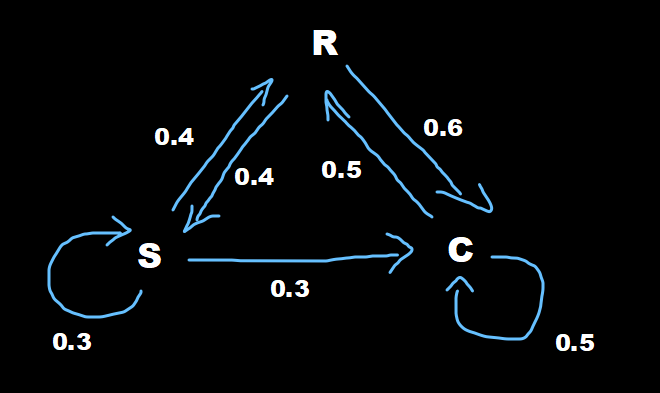

In [8]:
# Let's take an example of the weather and suppose that it only depends on the
# weather of the day before. The three states could be sunny, rainy and cloudy
# {S,R,C}
# The next image illustrates the probabilities of the next state given the
# previous one.
Image(filename="imgs/fig1.PNG",width=300,height=300)

In [9]:
# Given this directed graph, there could be any randoms paths, and for every
# every random path there is a probabilitie for every state, for example:
# S->R->C->C->R->C (len=6)
# In the given path the probabilitie of every state is as follows:
# In the case of sunny, there is only one occurrence: p(S)=1/6;
# In the case of rainy, there is two occurrences: p(R)=2/6=1/3;
# In the case of cloudy, there is three occurrences: p(R)=3/6=1/2;
# But we are interested in what happens in the long run (when len->inf)
# Does this values converged to something?
# If it converges this means that it have reached an equilibrium state
# To check if it converges we are going to create a program that simulates
# a random path with the given probabily distribution

In [10]:
# To do this we are going to create transition matrix A
# A=[[0.3, 0.4, 0.3],
#    [0.4,   0, 0.6],
#    [0  , 0.5, 0.5]]
# and "pi" is going to be the transition probabilites given a certain state
# if we start if a sunny day then pi0=[1 0 0];

import numpy as np
A=np.array([[0.3,0.4,0.3],[0.4,0,0.6],[0,0.5,0.5]])
pi0=np.array([[1,0,0]]);
temp=pi0

for i in range(3):
    temp=temp@A
    
print(f"3 steps:\n {temp}\n")

temp=pi0;
for i in range(5):
    temp=temp@A

print(f"5 steps:\n {temp}\n")

temp=pi0;
for i in range(10):
    temp=temp@A

print(f"10 steps:\n {temp}\n")

temp=pi0;
for i in range(100):
    temp=temp@A

print(f"100 steps:\n {temp}\n")

3 steps:
 [[0.183 0.34  0.477]]

5 steps:
 [[0.18195 0.32506 0.49299]]

10 steps:
 [[0.18352523 0.32102915 0.49544562]]

100 steps:
 [[0.18348624 0.32110092 0.49541284]]



In [11]:
# As it is shown an equilibrium state is reached, but how can we get to
# that value without iterating.
# To do that, we must satisy the next condition:
# if there is a equilibrium state "pie", then it exist "pie" such that:
# pie*A==pie;
# That means get the left eigenvector of matrix A with eigenvalue 1

from scipy.linalg import eig
w,vl,vr=eig(A,left=True)
print("w:\n",w)
print("vl:\n",vl)

w:
 [-0.44641016+0.j  0.24641016+0.j  1.        +0.j]
vl:
 [[ 0.43718376  0.75208185  0.2967934 ]
 [-0.81579601 -0.10075986  0.51938846]
 [ 0.37861224 -0.65132199  0.80134219]]


In [12]:
s=np.array([vl[:,2]])
s=s/np.sum(s) # Normalize the eigenvector
s

array([[0.18348624, 0.32110092, 0.49541284]])

In [13]:
# As we can see, the result is the same.

## Reducibility

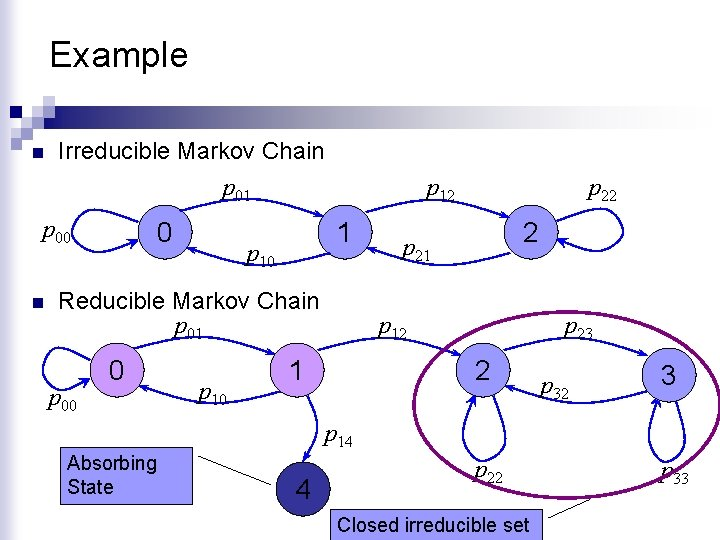

In [15]:
Image(filename="imgs/fig2.jpg",width=300,height=300)

In [16]:
# As it is shown in the image above a Markov chain is reducible if it contains
# states or set of states that are doesn't communicate with other states

## n-step Transition Matrix

In [17]:
# Let's define P_ij(k) as the probability of reaching state j from state i
# after exactly k steps
# It can be shown that:
# P_ij(n) = (A^n)_ij

In [22]:
# As an example let's calculate the probability of reaching state C from state
# R after exactly 2 steps
# To do that we have to take into account every possible path and sum their
# probabilities
# R->R->C (A[1,1]*A[1,2])
# R->S->C (A[1,0]*A[0,2])
# R->C->C (A[1,2]*A[2,2])
# so the result would be: A[1,1]*A[1,2]+A[1,0]*A[0,2]+A[1,2]*A[2,2]
# that is the same as: A[1,:]*A[:,2]
# that is the same as: (A^2)[1,2]
A_2=A@A
print(f"The probability of reaching C from state R after exactly 2 steps is: {A_2[1,2]}")

The probability of reaching C from state R after exactly 2 steps is: 0.42


In [24]:
# So what happens when n->inf
# the interpretation would be, what is the probability of reaching state j
# from state i after infinite steps.
# And if a equilibrium state exists then the values of the columns should 
# converege to the same values of the equilibrium state

A_100=np.linalg.matrix_power(A,100)
A_100

array([[0.18348624, 0.32110092, 0.49541284],
       [0.18348624, 0.32110092, 0.49541284],
       [0.18348624, 0.32110092, 0.49541284]])

In [25]:
# Then A[0] is the stationary distribution of the given markov change